> In this project we will make model that classify the face emotion such as:\
0. Angry, 1.Disgusting, 2.Fear, 3.Happy, 4.Neutral, 5.Sad, 6.Surprised

In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import gc

Os module, which is used for interacting with the operating system. This module provides various functions for working with files, directories, paths, and other system-related tasks.

In [2]:
classes = []
for i in os.listdir('C:\\Users\\HP\\Downloads\\train'):
    classes.append(i)
classes

['0', '1', '2', '3', '4', '5', '6']

Read all images and convert them to array

In [3]:
features = []
labels = []
train_data = []
def create_train():
    for photo in classes:
        path = os.path.join('C:\\Users\\HP\\Downloads\\train',photo)
        labels = classes.index(photo)
        ## loop over to get every img
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            new_array = cv.resize(img_array,(224,224),interpolation = cv.INTER_AREA)
            train_data.append([new_array,labels])
         
            
            if img_array is None:
                print("Error loading image:", img_path)
                continue
#             gray = cv.cvtColor(img_array, cv.COLOR_RGB2GRAY)
#             img_array1= cv.cvtColor(img_array,cv.COLOR_BGR2RGB)
            # gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
            
            

            
            
create_train()



In [4]:
# temp=np.array(train_data)
# temp.shape


In [4]:
del features
del labels
gc.collect()

import random
random.shuffle(train_data)
x=[]
y=[]
for features,label in train_data:
    x.append(features)
    y.append(label)
x=np.array(x)
y=np.array(y)

Deep learning for training the model - Transfer learning

In [5]:
from  tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [6]:
model = tf.keras.applications.MobileNetV2() ### Pre-trained model

In [7]:
base_input = model.layers[0].input
base_output = model.layers[-2].output ### exclude predictions

In [8]:
final_output = layers.Dense(128)(base_output) ### adding new layer, after global pooling layer
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output) ## as we have 7 class

In [9]:
from tensorflow import keras
new_model = keras.Model(inputs = base_input,outputs=final_output)
new_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
new_model.fit(x,y,epochs=10)

Epoch 1/10
898/898 [==============================] - 1926s 2s/step - loss: 1.2487 - accuracy: 0.5241
Epoch 2/10
898/898 [==============================] - 1911s 2s/step - loss: 1.0739 - accuracy: 0.5972
Epoch 3/10
898/898 [==============================] - 1872s 2s/step - loss: 1.0007 - accuracy: 0.6290
Epoch 4/10
898/898 [==============================] - 1842s 2s/step - loss: 0.9452 - accuracy: 0.6498
Epoch 5/10
898/898 [==============================] - 1882s 2s/step - loss: 0.8947 - accuracy: 0.6692
Epoch 6/10
898/898 [==============================] - 1778s 2s/step - loss: 0.8405 - accuracy: 0.6879
Epoch 7/10
898/898 [==============================] - 1799s 2s/step - loss: 0.7875 - accuracy: 0.7122
Epoch 8/10
898/898 [==============================] - 1771s 2s/step - loss: 0.7369 - accuracy: 0.7286
Epoch 9/10
898/898 [==============================] - 1763s 2s/step - loss: 0.6862 - accuracy: 0.7475
Epoch 10/10
898/898 [==============================] - 1816s 2s/step - loss: 0.619

In [11]:
new_model.save('path_to_save_model.h5')

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# new_model = load_model('path_to_save_model.h5')


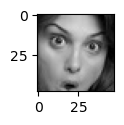

In [60]:
frame = cv.imread('Surprised.jpg')
# cv.imshow('sad',frame)
# cv.waitKey(0)
plt.figure(figsize=(1,1))
plt.imshow(frame)

In [61]:
gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

In [62]:
haar_Cascade =cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = haar_Cascade.detectMultiScale(gray,1.007,3)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv.rectangle(frame,(x,y),(x+w,y+h),(225,0,0),2)
    facess = haar_Cascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print('face not detected')
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

In [63]:
final_image = cv.resize(face_roi,(224,224),interpolation = cv.INTER_AREA)
final_image = np.expand_dims(final_image,axis=0)
final_image = np.expand_dims(final_image, axis=-1)

## Normalize
final_image = final_image/255.0
pred = new_model.predict(final_image)


1/1 [==============================] - 0s 40ms/step


In [64]:
# haar_Cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
# faces = haar_Cascade.detectMultiScale(gray, 1.1, 1)

# for x, y, w, h in faces:
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = frame[y:y+h, x:x+w]
#     cv.rectangle(frame, (x, y), (x+w, y+h), (225, 0, 0), 2)
    
#     facess = haar_Cascade.detectMultiScale(roi_gray)
    
#     if len(facess) == 0:
#         print('Face not detected')
#     else:
#         for (ex, ey, ew, eh) in facess:
#             face_roi = roi_color[ey:ey+eh, ex:ex+ew]
            
#             final_image = cv.resize(face_roi, (224, 224), interpolation=cv.INTER_AREA)
#             final_image = np.expand_dims(final_image, axis=0)
#             final_image = np.expand_dims(final_image, axis=-1)

#             # Normalize
#             final_image = final_image / 255.0

#             pred = new_model.predict(final_image)


In [65]:
pred

array([[0.06305757, 0.00838751, 0.08136289, 0.17644145, 0.2749046 ,
        0.07381088, 0.32203507]], dtype=float32)

In [66]:
np.argmax(pred)

6